<a href="https://colab.research.google.com/github/vanhau8562/AI-/blob/main/ND_MON_AN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks (1)/BT/nhan_mon_an

/content/drive/.shortcut-targets-by-id/1RhyDbz8sumcr_A27lkVwoL4keJgaMkNr/Colab Notebooks/BT/nhan_mon_an


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/BT/nhan_mon_an/train',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 589 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks (1)/BT/nhan_mon_an/Validation/Validation',target_size=(100,100), batch_size=32, class_mode='categorical')

Found 589 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'banh mi': 0,
 'banh trang tron': 1,
 'banh xeo': 2,
 'bun dau mam tom': 3,
 'canh kho qua': 4,
 'chan ga nuong': 5,
 'che': 6,
 'pho': 7,
 'thit kho trung': 8,
 'vit quay': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'banh mi': 0,
 'banh trang tron': 1,
 'banh xeo': 2,
 'bun dau mam tom': 3,
 'canh kho qua': 4,
 'chan ga nuong': 5,
 'che': 6,
 'pho': 7,
 'thit kho trung': 8,
 'vit quay': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(100,100,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
19/19 [==============================] - 250s 13s/step - loss: 2.8554 - accuracy: 0.1171 - val_loss: 2.2822 - val_accuracy: 0.1494
Epoch 2/100
19/19 [==============================] - 14s 754ms/step - loss: 2.2345 - accuracy: 0.1596 - val_loss: 2.1104 - val_accuracy: 0.1460
Epoch 3/100
19/19 [==============================] - 14s 752ms/step - loss: 2.1245 - accuracy: 0.1800 - val_loss: 1.9734 - val_accuracy: 0.2683
Epoch 4/100
19/19 [==============================] - 14s 757ms/step - loss: 1.9797 - accuracy: 0.2224 - val_loss: 1.8693 - val_accuracy: 0.3158
Epoch 5/100
19/19 [==============================] - 14s 744ms/step - loss: 1.8620 - accuracy: 0.2818 - val_loss: 1.6038 - val_accuracy: 0.4363
Epoch 6/100
19/19 [==============================] - 14s 729ms/step - loss: 1.6365 - accuracy: 0.3922 - val_loss: 1.3836 - val_accuracy: 0.5382
Epoch 7/100
19/19 [==============================] - 14s 744ms/step - loss: 1.4829 - accuracy: 0.4499 - val_loss: 1.1975 - val_accuracy: 

In [ ]:
# Lưu lại
model.save("nhan_dien_mon_an.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('nhan_dien_mon_an.h5')

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model_CNN.evaluate(training_set,verbose = 0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.010051427409052849
Train Accuracy 0.9949066042900085


<function matplotlib.pyplot.show(*args, **kw)>

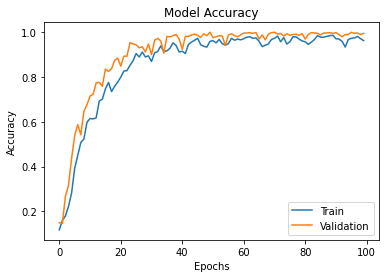

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E6603A290>
1/1 [==============================] - 0s 254ms/step
Ten mon an: bun dau manm tom
Chu thich: Du lieu nam trong Test1


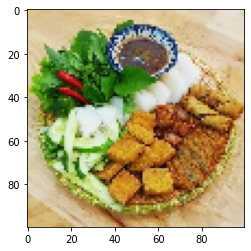

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E50369710>
1/1 [==============================] - 0s 16ms/step
Ten mon an: banh xeo
Chu thich: Du lieu nam trong Test1


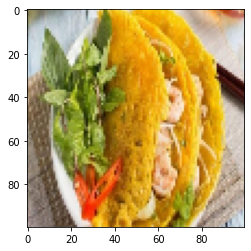

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E499B6450>
1/1 [==============================] - 0s 15ms/step
Ten mon an: thit kho trung
Chu thich: Du lieu nam trong Test1


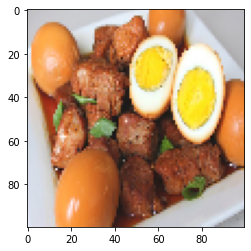

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E50353750>
1/1 [==============================] - 0s 16ms/step
Ten mon an: vit quay
Chu thich: Du lieu nam trong Test1


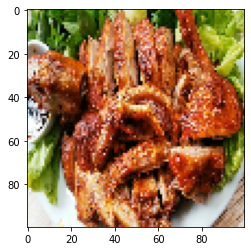

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E49A28F90>
1/1 [==============================] - 0s 15ms/step
Ten mon an: banh mi
Chu thich: Du lieu nam trong Test1


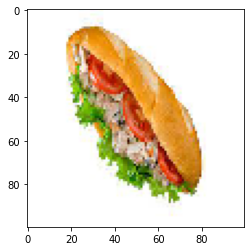

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E5009C910>
1/1 [==============================] - 0s 18ms/step
Ten mon an: vit quay
Chu thich: Du lieu nam trong Test1


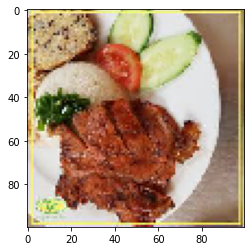

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E50353750>
1/1 [==============================] - 0s 16ms/step
Ten mon an: che
Chu thich: Du lieu nam trong Test1


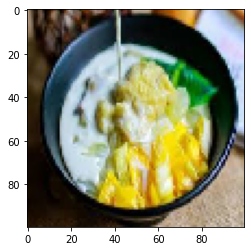

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BED0350>
1/1 [==============================] - 0s 23ms/step
Ten mon an: canh kho qua
Chu thich: Du lieu nam trong Test1


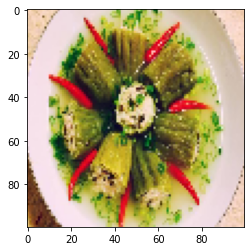

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BE75DD0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: banh trang tron
Chu thich: Du lieu nam trong Test1


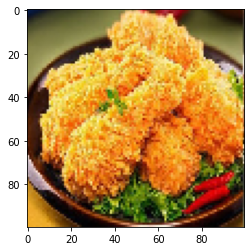

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BE38FD0>
1/1 [==============================] - 0s 15ms/step
Ten mon an: pho
Chu thich: Du lieu nam trong Test1


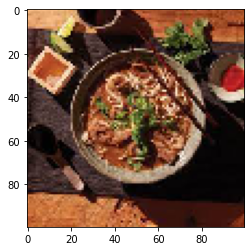

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E49A9A710>
1/1 [==============================] - 0s 19ms/step
Ten mon an: che
Chu thich: Du lieu nam trong Test2


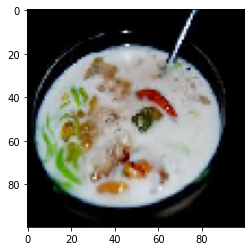

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BCDBF10>
1/1 [==============================] - 0s 16ms/step
Ten mon an: bun dau manm tom
Chu thich: Du lieu nam trong Test2


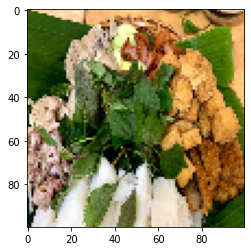

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BC5F810>
1/1 [==============================] - 0s 17ms/step
Ten mon an: thit kho trung
Chu thich: Du lieu nam trong Test2


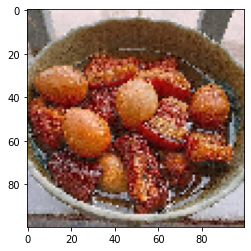

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BCAC110>
1/1 [==============================] - 0s 17ms/step
Ten mon an: thit kho trung
Chu thich: Du lieu nam trong Test2


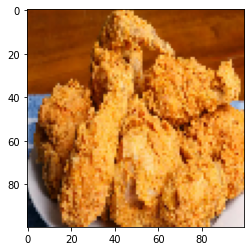

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E49A18A10>
1/1 [==============================] - 0s 17ms/step
Ten mon an: vit quay
Chu thich: Du lieu nam trong Test2


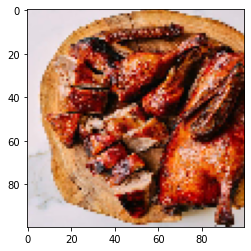

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BC7FDD0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: canh kho qua
Chu thich: Du lieu nam trong Test2


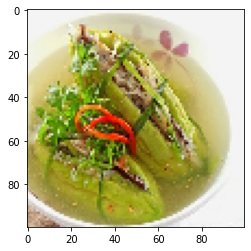

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BD706D0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: pho
Chu thich: Du lieu nam trong Test2


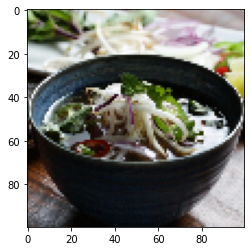

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BB3AB90>
1/1 [==============================] - 0s 17ms/step
Ten mon an: banh mi
Chu thich: Du lieu nam trong Test2


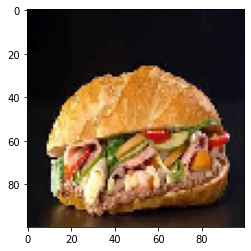

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BB4DC50>
1/1 [==============================] - 0s 18ms/step
Ten mon an: banh xeo
Chu thich: Du lieu nam trong Test2


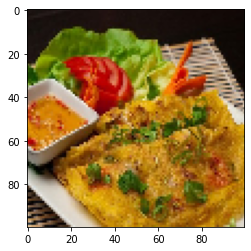

<PIL.Image.Image image mode=RGB size=100x100 at 0x7F5E4BBED8D0>
1/1 [==============================] - 0s 16ms/step
Ten mon an: chan ga nuong
Chu thich: Du lieu nam trong Test2


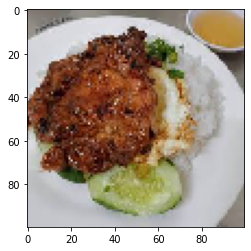

In [ ]:
test1="/content/drive/MyDrive/Colab Notebooks (1)/BT/nhan_mon_an/Test/Test 1/Test1"
test2="/content/drive/MyDrive/Colab Notebooks (1)/BT/nhan_mon_an/Test/Test2"
test = [test1, test2]
stt = 0
for j in test:
  stt += 1
  for i in os.listdir(j):
    img=load_img(j+'/'+i,target_size=(100,100))
    print(img)
    plt.imshow(img)
    img=img_to_array(img)
    img=img.astype('float32')
    img=img/255
    img=np.expand_dims(img,axis=0)
    result=model_CNN.predict(img)
    if round(result[0][0])==1:
      prediction='banh mi'
    if round(result[0][1])==1:
      prediction='banh trang tron'
    if round(result[0][2])==1:
      prediction='banh xeo'
    if round(result[0][3])==1:
      prediction='bun dau manm tom'
    if round(result[0][4])==1:
      prediction='canh kho qua'
    if round(result[0][5])==1:
      prediction='chan ga nuong'
    if round(result[0][6])==1:
      prediction='che'
    if round(result[0][7])==1:
      prediction='pho'
    if round(result[0][8])==1:
      prediction='thit kho trung'
    if round(result[0][9])==1:
      prediction='vit quay'
    print('Ten mon an:',prediction)
    print(f'Chu thich: Du lieu nam trong Test{stt}')
    plt.show()